## Исследование данных о российском кинопрокате



### Шаг 1. Чтение данных и объединение файлов. 

Объединение данных

Цель: Изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку

In [1]:
# Добавление необходимых библиотек
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Сохранение данных из файла
try:
    df_one = pd.read_csv('C:\\Users\\user\\library_jupyter\\sprint_4\\mkrf_movies.csv',sep=',')
    df_two = pd.read_csv('C:\\Users\\user\\library_jupyter\\sprint_4\\mkrf_shows.csv',sep=',')
except:
    df_one = pd.read_csv('/datasets/mkrf_movies.csv',sep=',')
    df_two = pd.read_csv('/datasets/mkrf_shows.csv',sep=',')


In [3]:
# Отображение всех колонок в выводимых таблицах
pd.set_option('display.max_columns', None)

Первым делом - будут объеденены 2 датафрейма, по столбцу puNumber <br>
Для слияния таблицы mkrf_movies и mkrf_shows, puNumber в обоих датафреймах приведена к одинаковому типу данных - int. Значения в столбце, отличные от int удалены.

In [4]:
df_one = df_one[df_one['puNumber'] != 'нет'].reset_index(drop=True)

In [5]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
df_one['puNumber'] = df_one['puNumber'].astype('int')

In [8]:
# слияние таблиц 
df = df_one.merge(df_two,on='puNumber', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Проверка названий столбцов

In [9]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Для удобства требуется заменить название столбца puNumber на pu_number, для выдержки единого стиля

In [10]:
df = df.rename(columns={'puNumber':'pu_number'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
df.sample(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
152,Жестокость,111011614,2014-10-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Скуйбин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,драма,2.000000e+02
5877,Красный воробей,121009818,2018-05-31T12:00:00.000Z,Художественный,"Чернин Интертейнмент, Филм Ритес, Саундтрэк Нь...",США,Френсис Лоуренс,"Дэвид Рэди, Дженно Топпинг, Питер Чернин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.5,"боевик,триллер,драма",1.436409e+08


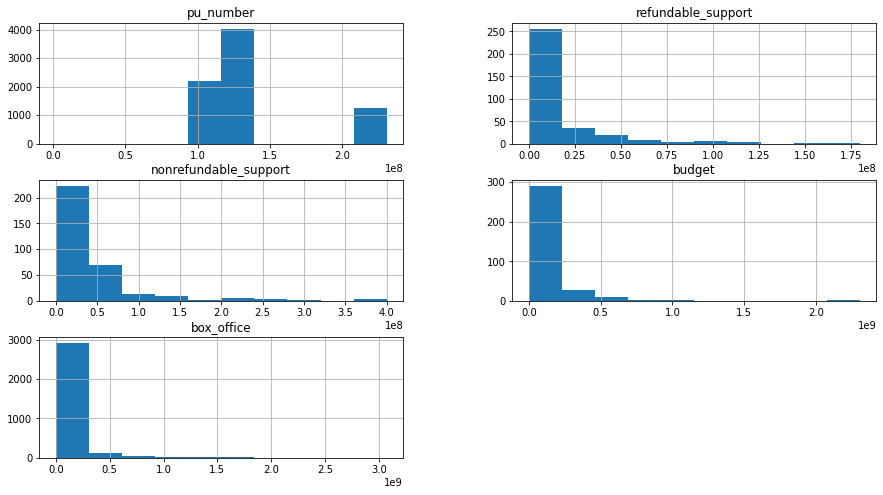

In [13]:
df.hist(figsize=(15,8));

Итого, по первому взгляду на данные:
- присутствуют столбцы, тип данных которых стоит заменить на целочисленный и дату
- присутствуют анамальные и редкие значение в количественных столбцах
- название колонок, после редактирование корректное
- примерно в половине столбцов, присутствуют пропущенных значения, которые следует детально изучить
- необходимо выполнить проверку в категориальных столбцах на явные и неявные дубликаты. Следует учесть, что у одного фильма может быть несколько прокатных удостоверений


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

Если есть возможность, то предпочтительнее использовать int, взамен float. Это обеспечивает дополнительную производительность при вычислениях.
Следующие столлбцы не имеют дробной части, необходимо перевести в int<br>
-refundable_support — объём возвратных средств государственной поддержки;<br>
-nonrefundable_support — объём невозвратных средств государственной поддержки;<br>
-budget — общий бюджет фильма<br>

Столбец box_office - для проведения операций с другими столбцами, нужно перевести в int. Точность до копеек в столбце не нужна<br>
-box_office — сборы в рублях<br>

Столбец рейтинг переведем в тип данных float.<br>
-ratings — рейтинг фильма на КиноПоиске

Формат даты более всего подходит для работы с датой. show_start_date нужно перевести в datetime64


In [14]:
edit_value = ['refundable_support','nonrefundable_support','budget','box_office']
for val in edit_value:
    df[val] = np.floor(pd.to_numeric(df[val], errors='coerce')).astype('Int64')
df['ratings'] = np.floor(pd.to_numeric(df['ratings'], errors='coerce'))

In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

In [16]:
df.dtypes

title                            object
pu_number                         int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support                Int64
nonrefundable_support             Int64
budget                            Int64
financing_source                 object
ratings                         float64
genres                           object
box_office                        Int64
dtype: object

#### Шаг 2.2. Изучение пропусков

Проверка пропусков по столбцам

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    object        
 13  rat

In [18]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

Процентное соотношение количества пропусков по столбцам

In [19]:
df.isna().mean().sort_values(ascending=False)*100

refundable_support       95.564462
nonrefundable_support    95.564462
budget                   95.564462
financing_source         95.564462
box_office               57.808951
ratings                  13.293253
genres                   13.026052
producer                  7.588510
film_studio               0.240481
director                  0.120240
production_country        0.026720
title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
age_restriction           0.000000
dtype: float64

Столбцы film_studio, director, production_country имеют пропущенных данных - менее 0,5%.
Можно удалить строки с пропущенными данными в этих столбцах. 

In [20]:
df = df.dropna(subset=['film_studio', 'director', 'production_country']).reset_index(drop=True) 

Неизвестна природа пропуска значения в столбце producer с именем продюсера. Замена значений в столбце не повлияет на анализ вопросов.
Столбец заполним значением "unknown"

In [21]:
df['producer'] = df['producer'].fillna('unknown')

In [22]:
# проверка строк, где одновременно отсутствуют значения и в жанре, и в рейтнинге
(
    df[
    (df['ratings'].isna()) 
    & (df['genres'].isna())
    ]['ratings'].isna().sum()
)

950

По какой-то причине, пропуски в столбце с жанром фильма и рейтингом - связаны. В 99% случаев, в строке, где есть пропуск в жанре фильма, будет пропуск и в его рейтинге.
Столбцы заполним значением "unknown" и -1

In [23]:
df['genres'] = df['genres'].fillna('unknown')
df['ratings'] = df['ratings'].fillna(-1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7458 non-null   object        
 1   pu_number              7458 non-null   int64         
 2   show_start_date        7458 non-null   datetime64[ns]
 3   type                   7458 non-null   object        
 4   film_studio            7458 non-null   object        
 5   production_country     7458 non-null   object        
 6   director               7458 non-null   object        
 7   producer               7458 non-null   object        
 8   age_restriction        7458 non-null   object        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    object        
 13  rat

In [25]:
df[df['genres'] == 'unknown']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
7452,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,219569
7453,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>
7455,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,-1.0,unknown,<NA>


По данным видно, что пропуски в жанре и рейтинге, не зависят от других столбцов. Вероятнее всего данные пострадали при выгрузке. 

В столбце box_office, у более половины фильмов отсутствуют данные о сумме сборов. 
медианным и средним значением пропуски не заполнить, пострадает качество анализа. Вернее всего будет оставить как есть, и исследовать вопрос сборов далее, только для тех данных, которые имеют заполненные значения, очищенные от выбросов.


refundable_support — объём возвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
nonrefundable_support — объём невозвратных средств государственной поддержки  
Для 95% данных, отсутствуют значения в этих столбцах. Пропуски в этих столбцах связаны между собой и следовательно, если в строке есть пропуск в бюджете, будет пропуск в других 3 столбцах.  
Также известно, что данные в столбце budget указаны только для тех фильмов, которые получили государственную поддержку.  
Можно сделать вывод, что отсутствующие значения говорят о том, что фильм не получил государственной поддержки.  
В столбце со строковым типом - данные примут значение "unknown". В числовых столбцах данные остануться как есть.

In [26]:
# Проверка совпадения количества строк, где одновременно пропущены значения во всех 4 столбцах
(
    df[(df['refundable_support'].isna())
    & (df['financing_source'].isna())
    & (df['budget'].isna())
    & (df['nonrefundable_support'].isna())
    ]['pu_number'].count()
)

7126

In [27]:
df[['refundable_support','financing_source','budget','nonrefundable_support']].isna().sum()

refundable_support       7126
financing_source         7126
budget                   7126
nonrefundable_support    7126
dtype: int64

7126 пропусков, именно это значение пропущенных значений имеет каждый столбец.  
Количество совпадает

In [28]:
# заполнение пропусков с источником финансирования
df['financing_source'] = df['financing_source'].fillna('unknown')

В столбце бюджет у 17 строк, значения бюджета принимает 0.  
Принято решение считать эти данные выбросами, и избавиться от них в дальнейших расчетах

In [29]:
# количество строк до удаления
df.shape

(7458, 16)

In [30]:
print(f'Количество нулевых значений до редактирования:{df[df["budget"] == 0]["title"].count()}')
df = df[(df['budget'] != 0) | (df['budget'].isna())]
print(f'Количество нулевых значений после редактирования:{df[df["budget"] == 0]["title"].count()}')

Количество нулевых значений до редактирования:17
Количество нулевых значений после редактирования:0


In [31]:
# количество строк после удаления
df.shape

(7441, 16)

Проверим, было ли что-то пропущено

In [32]:
df.isna().mean().sort_values(ascending=False)*100

refundable_support       95.766698
nonrefundable_support    95.766698
budget                   95.766698
box_office               57.828249
title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.000000
production_country        0.000000
director                  0.000000
producer                  0.000000
age_restriction           0.000000
financing_source          0.000000
ratings                   0.000000
genres                    0.000000
dtype: float64

Итого: обработаны пропуски там, где это возможно.  
Пропуски остались в столбцах бюджета и поддержки от государства, а также в столбце с информацией о сборах фильма.

#### Шаг 2.3. Изучение дубликатов

Проверка на общее количество дубликатов во всех столбцах, а также в столбце с названием фильма и прокатным удостоверением.  
В процессе слияния данных из 2 таблиц, могли возникнуть дубликаты таких строк.

In [33]:
df.duplicated(subset=['title','pu_number']).sum()

0

In [34]:
df.duplicated().sum()

0

Итого: явных дубликатов в строках нет.  
Далее идет проверка и обработка неявных дубликатов.

#### Шаг 2.4. Изучение категориальных значений

В некоторых категориальных значениях присутствуют лишние пробелы. Эти значения необходимо заменить для полноты данных по категориям.

In [35]:
# функция для возврата количества уникальных значений в столбце
# принимает название столбца (список) и значение true или false, если false - выводит количество, если true - убирает лишние пробелы, и приводит к 1 виду
def return_count(name_col,do=False):
    for val in name_col:
        if do == False:
            print(f'количество уникальных значений в столбце {val}: {len(df[val].unique())}')   
        elif do == True:
            df[val] = df[val].str.strip()

In [36]:
value_column = (
    ['title','type','production_country','director',
    'producer','age_restriction','genres','financing_source','film_studio']
)

In [37]:
return_count(value_column,False)

количество уникальных значений в столбце title: 6728
количество уникальных значений в столбце type: 8
количество уникальных значений в столбце production_country: 950
количество уникальных значений в столбце director: 4786
количество уникальных значений в столбце producer: 5321
количество уникальных значений в столбце age_restriction: 5
количество уникальных значений в столбце genres: 742
количество уникальных значений в столбце financing_source: 4
количество уникальных значений в столбце film_studio: 5476


In [38]:
return_count(value_column,True)

In [39]:
return_count(value_column,False)

количество уникальных значений в столбце title: 6728
количество уникальных значений в столбце type: 6
количество уникальных значений в столбце production_country: 934
количество уникальных значений в столбце director: 4776
количество уникальных значений в столбце producer: 5308
количество уникальных значений в столбце age_restriction: 5
количество уникальных значений в столбце genres: 742
количество уникальных значений в столбце financing_source: 4
количество уникальных значений в столбце film_studio: 5449


Итого: Почти во всех категориальных столбцах присутствует общая проблема - большое количество уникальных данных. Это значение слишком велико, и сгруппировать данные по этим столбцам не выйдет. При необходимости, с этими данными следует проводить более тонкую работу.  
  

Обработаны неявные дубликаты, с лишним пробелом в названии, данные приобрели большую целостность и структурированность.  
Сильной обработкой категориальных переменной заниматься нет необходимости.  
Название фильма, тип, страна, режиссер и продюсер не играют основной роли в анализе, в случае необходимости, эти значения будут обработаны далее.  
В возрастной категории дубликатов нет, из столбца жанров - далее будет использован только основной жанр, стоящим первым.  
Источник финансирования будет обработан далее, в случае необходимости.

#### Шаг 2.5. Проверка количественных значений


Основные столбцы, которые подлежат детальному изучению - refundable_support, nonrefundable_support, budget

Прописаны необходимые функции, для изучения количественных столбцов.  
Показывает количество анамальных значений, а также отрисовывает гистограмму и диаграмму размаха

In [40]:
'''Функция для построения гистограммы и диаграммы размаха
может принимать в себя:
обязательное поля: 
название столбца - data_column
размер минимального значения для построения диаграммы по оси x - min
размир максимального значения для построения диаграммы по оси x - max
необязательные поля:
размер корзин - bins
'''

def plot_show(data_column,min,max,bins=25):
    # размер диаграммы
    plt.figure(figsize=(10,5)) 
    # Построение диаграммы
    (df[data_column]
        .plot(
            kind='hist',
            bins=bins,
            histtype='step',
            linewidth=3,
            alpha=1,
            label=data_column,
        )
    )
    # заголовки для осей
    plt.xlabel(data_column)
    plt.ylabel('Количество записей')
    #
    #plt.ylim(минимум, максимум)
    plt.xlim(min, max)
    # название диаграммы
    plt.title(f'Гистограмма для {data_column}')
    # Линия среднего и медианного значений
    #plt.axhline(y=df[data_column].median(),label='Медианное значение', color='r', linestyle='--')
    #plt.axhline(y=df[data_column].mean(),label='Среднее значение', color='b')
    # легенда графика
    plt.legend()
    # включение сетки, для обеих осей
    plt.grid(True,axis='both',linestyle='--', linewidth=0.5)
    # показ графика
    plt.show()
    print('============================================================================================')
    print(df[data_column].describe())
    print('============================================================================================')
    # размер диаграммы
    plt.figure(figsize=(10,5)) 
    # построение графика
    df.boxplot(column=data_column)
    # название диаграммы
    plt.title(f'Диаграмма размаха для {data_column}')
    plt.show()

In [41]:
# функция для подсчета количества некорректных значений
def invalid_count(inv,min,max):
    print(f'Данных - {df[(df[inv] < min) | (df[inv] > max)][inv].count()} строк(и)')

##### budget

Перевод значений столбца бюджета в миллионы, для более красивого отображения на графике и масштабирования общей картины.

In [42]:
df['budget_mln'] = df['budget'] / 1000000

По графику видно, как все основные значения расположены в диапазоне 0-150 млн. Далее значения идут на спад, и значений с более 500 млн бюджета, всего 11 штук.  
медианное значение - 73 млн, а среднее значение - 134 млн, из за анамально больших и редких значений, оно почти в 2 раза больше медианного.

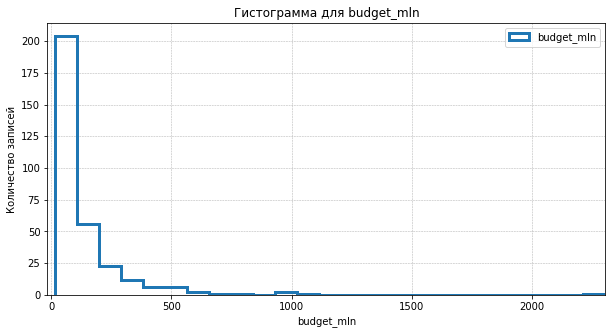

count     315.000000
mean      134.096082
std       191.226040
min        14.462464
25%        46.153866
50%        73.379554
75%       150.004287
max      2305.074303
Name: budget_mln, dtype: float64


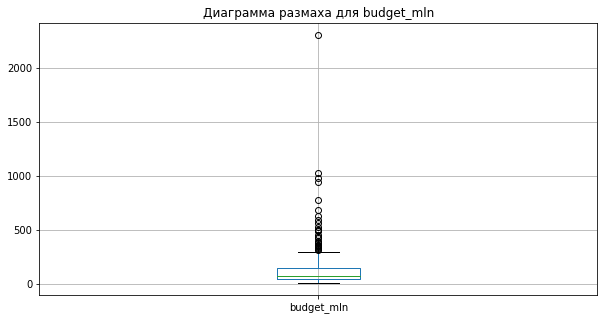

In [43]:
plot_show(
    'budget_mln',
    (df['budget_mln'].min()-30),
    df['budget_mln'].max()
)

In [44]:
invalid_count('budget_mln',2,500)

Данных - 11 строк(и)


Данные, бюджет которых составили более 500 млн - являются редкими анамальными значениями. Далее эти данные приняты в анализ не будут

In [45]:
# количество строк до удаления
df.shape

(7441, 17)

In [46]:
df = df[(df['budget_mln'] <= 500) | (df['budget_mln'].isna())]

In [47]:
# количество строк после удаления
df.shape

(7430, 17)

##### nonrefundable_support

Перевод значений столбца невозвратной поддержки в миллионы, для более красивого отображения на графике и масштабирования общей картины.

In [48]:
df['nonrefundable_support_mln'] = df['nonrefundable_support'] / 1000000

График похож на нормальное распределение, есть минимальные значения в диапазоне 0-15 млн, далее пик в диапазоне 15-45 млн, после чего значения идут на спад.  
Среднее - 40 млн, медиана - 30 млн, разница между значениями не сильно велика.  
Очищать данные от анамалий не требуется, т.к. для общего бюджета отсавили значение в 500 млн, и это число может составлять доля невозвратной поддержки от государства.  
На текущий момент, эта доля не превышает 300 млн.

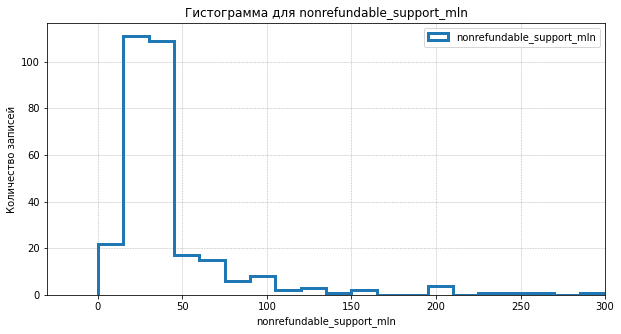

count    304.000000
mean      40.712547
std       39.475106
min        0.000000
25%       25.000000
50%       30.000000
75%       40.000000
max      300.000000
Name: nonrefundable_support_mln, dtype: float64


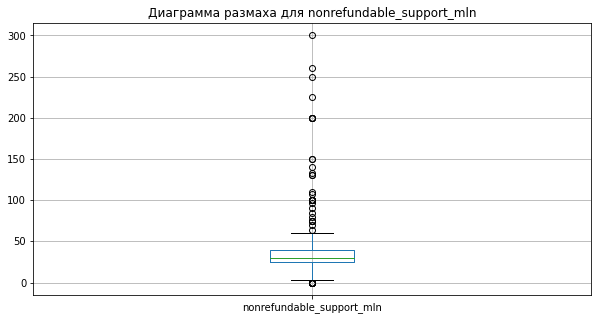

In [49]:
plot_show(
    'nonrefundable_support_mln',
    (df['nonrefundable_support_mln'].min()-30),
    df['nonrefundable_support_mln'].max(),
    bins=20
)

##### refundable_support

Перевод значений столбца возвратной поддержки в миллионы, для более красивого отображения на графике и масштабирования общей картины.

In [50]:
df['refundable_support_mln'] = df['refundable_support'] / 1000000

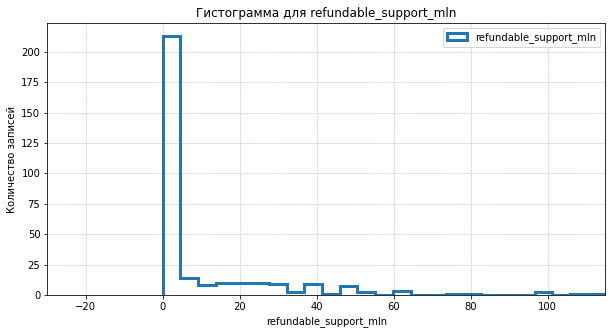

count    304.000000
mean       8.980263
std       18.862301
min        0.000000
25%        0.000000
50%        0.000000
75%       10.000000
max      115.000000
Name: refundable_support_mln, dtype: float64


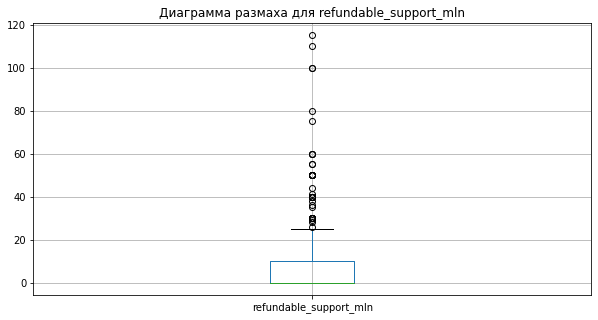

In [51]:
plot_show(
    'refundable_support_mln',
    (df['refundable_support_mln'].min()-30),
    df['refundable_support_mln'].max()
)

Много нулевых значений, но это корректно, т.к. имеет место быть, что государство чаще оказывает невозвратную поддержку на помощь в создании произведения.  
Аналогично столбцу с невозвратной поддержкой, очищать анамалии не требуется.

##### box_office

Перевод значений столбца сборов в миллионы, для более красивого отображения на графике и масштабирования общей картины.

In [52]:
df['box_office_mln'] = df['box_office'] / 1000000

Ровно 50% данных имеет значение сборов - меньше 2,25 млн рублей. Однако в данных много экстремальных значений, которые достигают сумму сборов до 3 млрд рублей.  
По графику видно, как пик заканчивается примерно на отметке в 50 млн, далее значения идут на спад.  
Из за экстремальных значений, среднее составляет 73 млн, а медиана 2,2 млн, разница колоссальная и говорит о большом разбросе данных.  
Хоть в данных и много выбросов, это важный столбец, из которого необходимо проанализировать все данные, включая экстремальные.  
Принято решение эти данныые оставить и принимать решение об оставлении их наполненности далее, по ходу анализа.

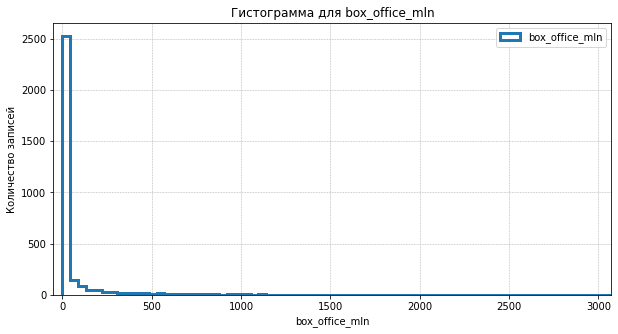

count    3128.000000
mean       73.266007
std       230.456059
min         0.000000
25%         0.083407
50%         2.267458
75%        22.926592
max      3073.568690
Name: box_office_mln, dtype: float64


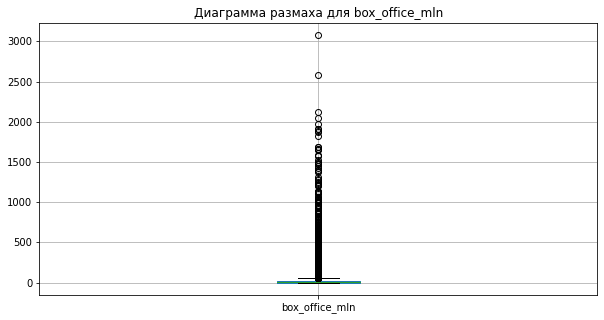

In [53]:
plot_show(
    'box_office_mln',
    (df['box_office_mln'].min()-50),
    df['box_office_mln'].max(),
    bins=70
)

Фильмы, собравшие более 200 млн рублей:

In [54]:
invalid_count('box_office_mln',0,200)

Данных - 287 строк(и)


##### Итог

По итогу были обработаны слишком выбивающиеся значения в столбце с бюджетом, не превышающие 500 млн.  
Что касается данных, получивших поддержку от государства, отсеяно около 3%, в связи с анамальными значениями

#### Шаг 2.6. Добавление новых столбцов

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [55]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [56]:
import re
'''
Функция возвращает Имя и Фамилию главного режиссера, и главный жанр фильма
Принимает таблицу с данными, и название столбца, для которого возвращается значение
'''
def director_genres(data,name):
    
    
    if name == 'director':
        data_var = data[name].split()
        regex = "^[а-яА-ЯёЁ]\.[а-яА-ЯёЁ]+$"
        pattern = re.compile(regex)
        if pattern.search(data_var[0]) is not None: # False 
            return data_var[0]
        if len(data_var) != 1:
            return data_var[0] + ' ' + data_var[1]
        return data_var[0]
        
    data_var = data[name].split(',')
    return data_var[0]

In [57]:
df['main_director'] = df.apply(director_genres,axis=1, args=('director',))
df['main_genre'] = df.apply(director_genres,axis=1, args=('genres',))

Проверка добавления столбцов

In [58]:
df.sample(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_mln,nonrefundable_support_mln,refundable_support_mln,box_office_mln,year,main_director,main_genre
3515,Закон ночи,121033716,2016-12-21 12:00:00,Художественный,"Уорнер Бразерс, Эппиан Вей, Перл Стрит",США,Бен Аффлек,"Бен Аффлек, Леонардо Ди Каприо, Дженнифер Дэви...",«18+» - запрещено для детей,<NA>,<NA>,<NA>,unknown,6.0,"боевик,триллер,драма",74550032,<NA>,<NA>,<NA>,74.550032,2016,Бен Аффлек,боевик
4851,Вторжение: Битва за рай,121001111,2011-02-02 12:00:00,Художественный,"Эмбиенс Интертейнмент, Омнилаб Медиа",Австралия-США,Стюарт Битти,"Майкл Буген, Эндрю Мэйсон",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,unknown,5.0,"боевик,драма,приключения",<NA>,<NA>,<NA>,<NA>,<NA>,2011,Стюарт Битти,боевик


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [59]:
df['support_state'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget'] * 100).astype(float).round(2)

Добавлен столбец с процентом государственной поддержки.  
Анамальных значений, к примеру, если процент поддержки переваливал бы за сотню или была бы нулевой, нет.

In [60]:
# Количество фильмов с поддержкой более 100%
df[(df['support_state'] == 0) | (df['support_state'] > 100)]['title'].count()

0

Итого: были добавлены столбцы с годом фильма, для разбиения данных по годам, главным жанром, главным режиссером и % государственной поддержки. 
Столбцы с главным жанром и режиссеров позволят понять, какие фильмы более популярные, и чьи работы имею куда больший успех. А также, как влияет на успех фильма, государственная поддержка.

#### Вывод: 
По результатам выполнения предобработки данных: 
- изменены типы данных у необходимых столбцов
- Изучены пропуски, и как они могут повлиять на анализ
- Проверены дубликаты строк
- Изучены количественные и категориальные переменные
- Добавлены новые столбцы, для более детального анализа

### Шаг 3. Проведение исследовательского анализа данных

#### кол-во фильмов в прокате
- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Создание сводных таблиц с информацией о общем количестве фильмов по годам, и количества, для скольки фильмов имеется информация о сборах.

In [61]:
df_year_count_1 = df.groupby(['year'])['pu_number'].agg('count').reset_index() # Общее кол-во
df_year_count_2 = df.groupby(['year'])['box_office'].agg('count').reset_index() # Кол-во со сборами

Объединение данных, с последующим построением графика

In [62]:
df_year_count = df_year_count_1.merge(df_year_count_2,on='year',how='left') # объединение таблиц
df_year_count['mean'] = (df_year_count['box_office'] / df_year_count['pu_number'] * 100).round(2) # подсчет среднего значения по годам

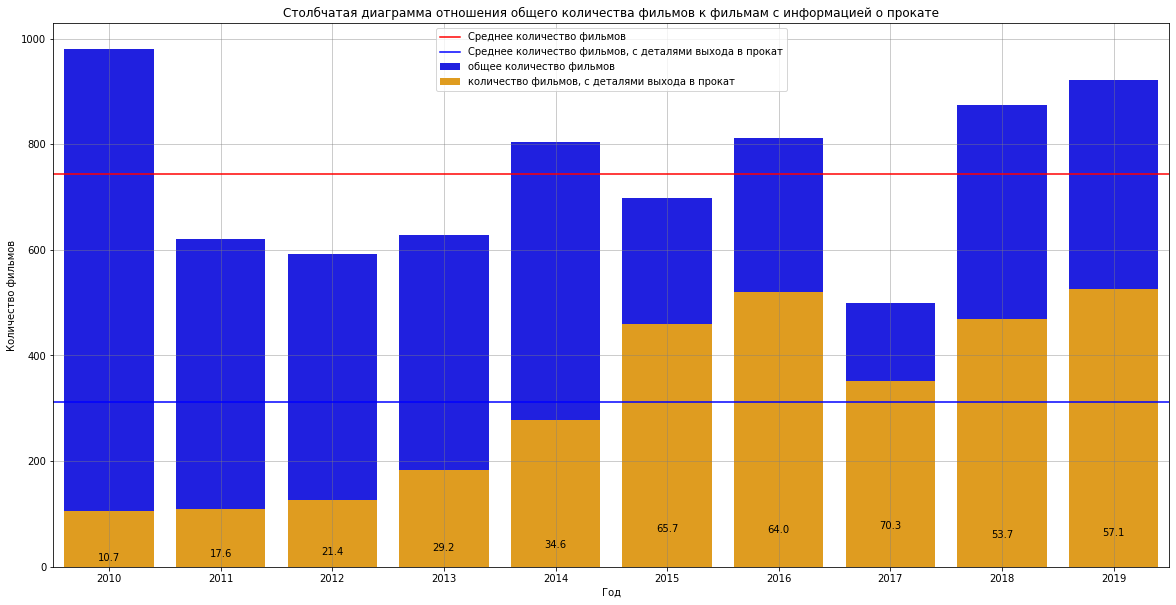

In [63]:
# Вычисление медианы и среднего значения выручки
avg = float(df_year_count['pu_number'].mean())
avg_ = float(df_year_count['box_office'].mean())

# Настройка размера фигуры
plt.figure(figsize=(20, 10))
# Построение столбчатой диаграммы с использованием данных из Dataframe 
ax = sns.barplot(data=df_year_count,x='year', y='pu_number',label='общее количество фильмов',color='blue')
sns.barplot(data=df_year_count,x='year', y='box_office',ax=ax,label='количество фильмов, с деталями выхода в прокат',color='orange')
# процентное соотношение 
for i, mean in enumerate(df_year_count['mean']):
    ax.text(i, mean+0.5, round(mean, 1), horizontalalignment='center')
# Установка заголовка графика
plt.title('Столбчатая диаграмма отношения общего количества фильмов к фильмам с информацией о прокате')
#Добавление подписи для оси у 
plt.ylabel('Количество фильмов')
# Добавление порииси аля оси Х
plt.xlabel('Год')
# Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
plt.grid(color='grey', axis='both', alpha=0.5)
# Добавление горизонтальной линии для медианного значения с красным цветом и пунктирной линией 
plt.axhline(y=avg, label='Среднее количество фильмов', color='r', linestyle='-')
# Добавление горизонтальной линии для среднего значения с синим цветом
plt.axhline (y=avg_, label='Среднее количество фильмов, с деталями выхода в прокат', color='b')
# Отображение легенды для горизонтальных линий
plt.legend()
# Показ графика
plt.show()

Вывод: между общим количеством выходящих в прокат фильмов, не прослеживается тенденции к росту или увеличением количества, по мере времени.  
В 2010 наибольшее количество фильмов вышло в прокат. 2017 год является наименьшим по выходу фильмов в прокат.  
Процентное соотношение фильмов, по которым есть информация о сборах, с каждым годом увеличивается. Если в 2010 году было известно о сборах только для 10% фильмов, то начиная с 2015 года, это значение не опускается ниже среднего и имеет значение 53-70%. 

#### экстремальные значения 
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Создание таблицы с суммой сборов по годам.

In [64]:
df_year_sum = df.groupby(['year'])['box_office'].agg(['sum']).reset_index()
df_year_sum['mlrd'] = df_year_sum['sum'] / 1000000000
df_year_sum

,year,sum,mlrd
0,2010,2428654,0.002429
1,2011,14102765,0.014103
2,2012,6911073,0.006911
3,2013,29799704,0.0298
4,2014,7434717823,7.434718
5,2015,38527827067,38.527827
6,2016,44975581068,44.975581
7,2017,44031948234,44.031948
8,2018,46980195992,46.980196
9,2019,47172558320,47.172558


Можно отследить положительную динамику роста сборов в прокате, по годам.  
Минимальный по сборам год - 2010, максимальный - 2019.  
Минимальная сумму за историю проката набрал фильм "Жестокий романс", прибыли этого фильма составляет 40 рублей, премьера фильма - 2013 год.  
Самый успешный фильм за историю проката - "Холоп", этот фильм принес прибыли около 3 млрд рублей, премьера фильма - 2019 год.

In [65]:
formatted_data = df[df['box_office_mln'] > 3000]['title'].to_string(index=False)
formatted_data

'Холоп'

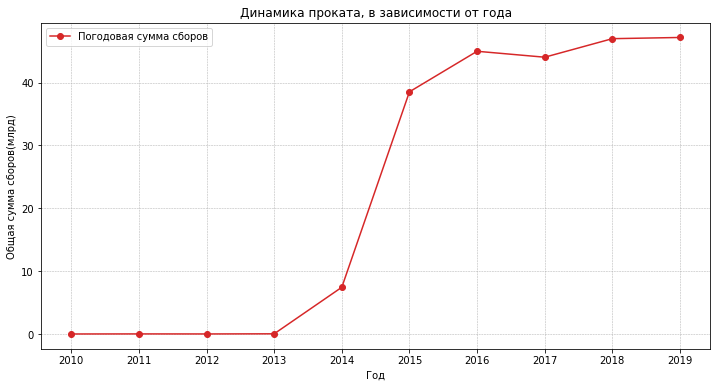

In [66]:
df_year_sum.plot(x='year', y='mlrd', style='o-',figsize=(12,6),color='tab:red',label='Погодовая сумма сборов')
#plt.yticks(np.arange(0, max(df_year_sum['max'])+100, 100.0));
plt.xticks(np.arange(min(df_year_sum['year']), max(df_year_sum['year'])+1, 1.0),);
plt.grid(True,axis='both',linestyle='--', linewidth=0.5)

plt.xlabel('Год')
plt.ylabel('Общая сумма сборов(млрд)')
# название диаграммы
plt.title('Динамика проката, в зависимости от года')
plt.legend()

plt.show()

Начиная с 2014 года можно наблюдать динамику увеличения общей суммы сборов.  
Если еще в 2013 году общая сумма сборов составляла 29 млн, то к 2019 году эта цифра выросла до 47 млрд рублей.  
В период 2013-2015 годов, резкий скачок по сборам. Далее, к 2019 году идет плавное замедление.

#### средние показатели
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [67]:
# функции для возврата среднего и медианного значений
def my_mean(x): return (x.mean())
def my_med(x): return (x.median())

Создание таблицы по всем данным, которые имеют сборы более 0 и менее 500 млн (выборка без экстремальных значений)

In [68]:
df_year_mean = df[(df['box_office_mln'] > 0) & (df['box_office_mln'] < 500)].groupby(['year'])['box_office_mln'].agg(['count',my_mean,my_med]).reset_index()
df_year_mean

,year,count,my_mean,my_med
0,2010,101,0.024046,0.00171
1,2011,109,0.129383,0.003
2,2012,122,0.056648,0.00611
3,2013,179,0.166479,0.00358
4,2014,268,14.617078,0.018885
5,2015,431,39.531616,4.280693
6,2016,491,37.384176,3.162713
7,2017,319,45.171555,7.304343
8,2018,441,45.693969,7.29261
9,2019,502,37.239484,4.170069


Создание таблицы с картинами, принесшими в российском прокате от 100 до 500 млн и дальнейшее построение графиков.

In [69]:
df_year_mean_line = df[(df['box_office_mln'] > 100) & (df['box_office_mln'] < 500)].groupby(['year'])['box_office_mln'].agg(['count',my_mean,my_med]).reset_index()

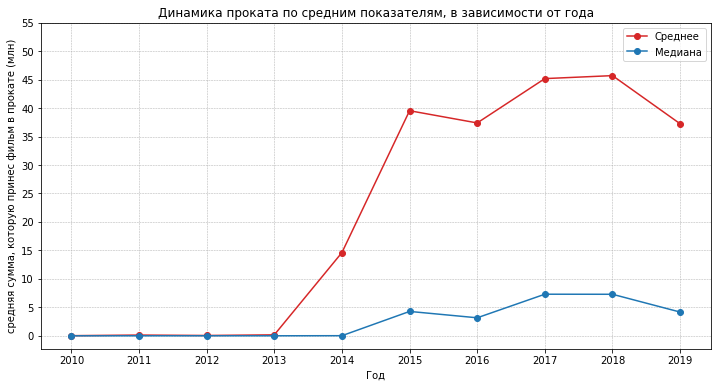

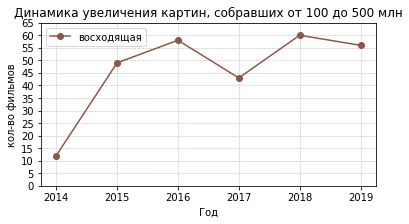

In [70]:
ax = df_year_mean.plot(x='year', y='my_mean', style='o-',figsize=(12,6),color='tab:red',label='Среднее');
df_year_mean.plot(x='year', y='my_med', style='o-',figsize=(12,6),label='Медиана',ax=ax);
plt.xticks(np.arange(min(df_year_mean['year']), max(df_year_mean['year'])+1, 1.0),);
plt.yticks(np.arange(0, max(df_year_mean['my_mean'])+10, 5.0));
plt.grid(True,axis='both',linestyle='--', linewidth=0.5);

plt.xlabel('Год');
plt.ylabel('средняя сумма, которую принес фильм в прокате (млн)');
# название диаграммы
plt.title('Динамика проката по средним показателям, в зависимости от года');
plt.show()

df_year_mean_line.plot(x='year', y='count', style='o-',figsize=(6,3),color='tab:brown',label='восходящая');
plt.yticks(np.arange(0, max(df_year_mean_line['count'])+10, 5.0));
plt.grid(True,axis='both',linestyle='--', linewidth=0.5);
plt.xlabel('Год');
plt.ylabel('кол-во фильмов');
# название диаграммы
plt.title('Динамика увеличения картин, собравших от 100 до 500 млн');
plt.show()

По диаграмме "динамика проката, в зависимости от года" хорошо видно, как с 2014 года стали появляться картины, приносящие от 1 млрд рублей.  
Для более точной картины по динамике средних показателей, в текущий выборке взяты фильмы, которые собрали до 500 млн.  
Медиана практически повторяет динамику средней линии. Увеличение суммы сборов, начиная с 2014 года, затем небольшой спад в период 2018-2019 годов.
Наглядно видно, как с 2014 года увеличивается количество картин, которые приносят от 100 млн в прокате.

#### возрастное ограничение
- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Создание функции, которая возвращает чистую категорию фильмов, для удобного проведения анализа по категориям

In [71]:
def rename_age(column):
    x = column.split()
    if len(x[0]) == 5:
        return x[0][1:3]
    return x[0][1:2]

In [72]:
df['age_restriction'] = df['age_restriction'].apply(rename_age)

In [73]:
df['age_restriction'] = df['age_restriction'].astype('int')


В столбцах, с рейтингом 0+, недостаточно данных для построения графика

In [74]:
# создание сводной таблицы, с количеством и средними значениями сборов каждой категории по годам
df_age_group = (df[(df['year'] >= 2015) & (df['box_office_mln'] > 0)]
                .groupby(['age_restriction','year'])['box_office_mln']
                .agg(['count','median','mean'])
                .reset_index()
                .sort_values(by=['age_restriction','year'])
               )
df_age_group = df_age_group[df_age_group['count'] > 30].reset_index(drop=True)
df_age_group

,age_restriction,year,count,median,mean
0,0,2015,38,2.949808,9.97512
1,0,2016,40,2.687779,3.750858
2,6,2015,52,19.513253,163.794458
3,6,2016,69,2.66083,154.360733
4,6,2017,42,46.190828,207.309898
5,6,2018,65,14.458669,152.519373
6,6,2019,79,12.175713,156.5993
7,12,2015,71,15.351562,189.007177
8,12,2016,80,4.225478,139.384526
9,12,2017,40,8.83887,181.525565


Построение графика для количества фильмов в каждой возрастной категории, и среднего количества средств, сколько они собрали в прокате.

In [75]:
def plot_create(column,name_title,min_=10,max_=6):
    fig, ax = plt.subplots()
    for age_group in df_age_group['age_restriction'].unique():
        df_age_group[df_age_group['age_restriction'] == age_group].plot(
            x='year', 
            y=column,
            style='o-', 
            ax=ax, 
            figsize=(min_,max_),
            label=age_group
        )
        
        plt.legend
        # Установка заголовка графика
        plt.title(f'Линейный график для {name_title} в возрастной категории по годам')
        #Добавление подписи для оси у 
        plt.ylabel(name_title)
        # Добавление порииси аля оси Х
        plt.xlabel('Год')
        # Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
        plt.grid(color='grey', axis='both', alpha=0.5)
        plt.xticks(np.arange(min(df_age_group['year']), max(df_age_group['year'])+1, 1.0),);
        
    plt.show()

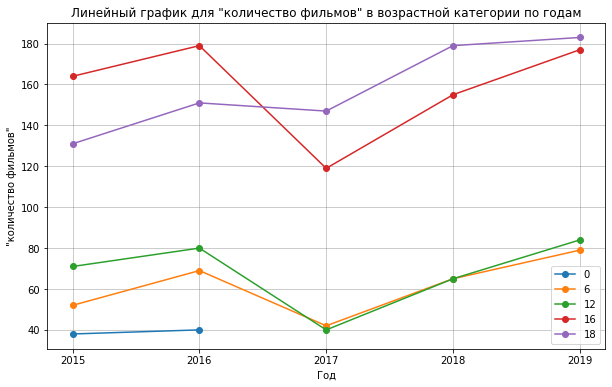

In [76]:
plot_create('count','"количество фильмов"')

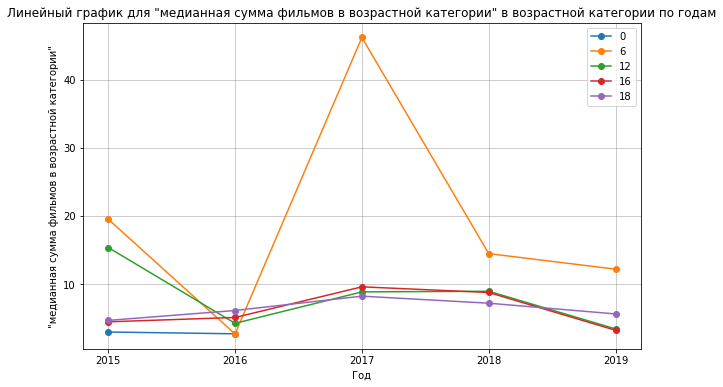

In [77]:
plot_create('median','"медианная сумма фильмов в возрастной категории"')

In [78]:
# являются ли картины 6+, мультиками
df[(df['year'] == 2017) & (df['box_office_mln'] > 0) & (df['age_restriction'] == 6)].groupby(['main_genre'])['main_genre'].agg('count')

main_genre
unknown            6
боевик             1
документальный     2
драма              1
комедия            3
мультфильм        25
приключения        2
семейный           1
фэнтези            1
Name: main_genre, dtype: int64

Итого: Наибольшее количество фильмов, вышедших в прокат, имеют категорию 16+ и 18+.  
Фильмы с рейтингом 6+, хоть их было и мало. В сравнении с категориями 16+ и 18+, в каждом году их количество примерно в 3-4 раза меньше.  
Однако, во все года, кроме 2016 (видимо, было затишье перед бурей), они лидируют в среднем показателе кассовых сборов.  
В 2017 году выходит более всего картин, имеющих большой успех. Это ярко выражено для категории 6+, менее ярко выражено для картин 12+, 16+ и 18+.  
Для фильмов 12+, 16+ и 18+ прослеживается плавный рост к 2017 год, и плавный спад к 2019 году. Эти категории находятся примерно на одном месте по сборам.

#### Вывод: 
С 2014 года можно наблюдать положительную динамику роста суммарных кассовых сборов фильмов, и в эти же года, полнота данных о сборах составляет наибольший процент.  
Также в России куда большую популярность имеют картины с возрастным ограничение 6+ и в подавляющем большинстве, эти картины являются мультфильмами.  
Хорошие 6+ мультфильмы охватывают наибольшее количество аудитории, т.к. интересна и маленьким детям, и подросткам, и даже взрослым, потому что как правило, в этих мультфильмах есть глубокий посыл и проблемный вопрос, который прослеживается в жизни людей каждой культуры.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для анализа использованы те данные, по которым имеется информация о поддержке со стороны государства  
Среди фильмов, вышедших в прокат, в период 2010-2019 г., финансовую поддержку получили 4,5% фильмов (332 фильма).  
К данному этапу, количество данных строк составляет 304

In [79]:
df_state = df[df['budget'] > 0].reset_index(drop=True)

In [80]:
# количество строк с финансированием от гос-ва
df_state.shape

(304, 24)

In [81]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      304 non-null    object        
 1   pu_number                  304 non-null    int64         
 2   show_start_date            304 non-null    datetime64[ns]
 3   type                       304 non-null    object        
 4   film_studio                304 non-null    object        
 5   production_country         304 non-null    object        
 6   director                   304 non-null    object        
 7   producer                   304 non-null    object        
 8   age_restriction            304 non-null    int64         
 9   refundable_support         304 non-null    Int64         
 10  nonrefundable_support      304 non-null    Int64         
 11  budget                     304 non-null    Int64         
 12  financin

Обработка пропусков

In [82]:
df_state = df_state.dropna(subset=['box_office']).reset_index(drop=True)

In [83]:
# количество строк с финансированием от гос-ва после чистки
df_state.shape

(291, 24)

#### 1 этап - вопрос
-Какой процент средств, в бюджете фильмов, составляет гос. поддержка по годам

In [84]:
df_state.groupby(['year'])['support_state'].agg(['count','median','mean'])

,count,median,mean
year,,,
2013,2,47.320,47.320000
2014,15,53.940,52.140667
2015,79,62.040,52.828861
2016,55,63.520,54.701091
2017,33,47.700,48.150303
2018,51,55.650,51.361373
2019,56,57.385,50.626964


В среднем, у фильмов, не менее половины бюджета составляет государственная поддержка.  
Данных за 2013 год недостаточно для включения их в выводы

Разделение данных на категории по степени поддержки государства.

In [85]:
def support_group(sup,min=25,mean=75,big=100):
    if sup <= min:
        return 'малая'
    if sup <= mean:
        return 'средняя'
    if sup <= big:
        return 'крупная'

In [86]:
df_state['category_support'] = df_state['support_state'].apply(support_group,args=(25,75,100,))
df_state_group = df_state.groupby('category_support')['category_support'].agg('count')
df_state_group

category_support
крупная      1
малая       25
средняя    265
Name: category_support, dtype: int64

Более 90% фильмов имеют поддержку от государства, более чем в 25% от общего бюджета.  
Наибольшее количество фильмов было проспонсировано в 2015 году.  
Наименее в 2014 и 2017 годах.  Можно предположить для 2017 года, что был риск спонсировать какие-то фильмы в год премьер легендарных мультфильмов, которые собрали огромное количество денег на кассовых сборах

#### 2 этап - вопрос
- Влияет ли эта гос поддрежка, а также, количество бюджета на рейтинг фильмов

Разделим фильмы на 3 категории
- малый бюджет
- средний бюджет
- крупный бюджет

Посчитаем средний рейтинг для каждой группы 

In [87]:
df_state['budget_mln'] = df_state['budget_mln'].astype(float).round(2)

df_state['category_budget'], bins = pd.qcut(
    df_state['budget_mln']
    ,q=3
    ,labels=['малый бюджет','средний бюджет','крупный бюджет']
    , retbins=True
)
print(bins)

[ 14.46        51.63333333 109.21666667 500.        ]


In [88]:
df_state.query('ratings > 0').groupby('category_budget',observed=False)['ratings'].agg(['count','mean','median']).reset_index()

,category_budget,count,mean,median
0,малый бюджет,86,5.604651,6.0
1,средний бюджет,94,5.457447,6.0
2,крупный бюджет,95,5.526316,6.0


Количество общего бюджета не играет роли в оценке зрителей.  
По таблице видно, что фильмы в каждой категории имеют примерно равный процент рейтинга.  

In [89]:
df_state.query('ratings > 0').groupby(['category_support','category_budget'],observed=False)['ratings'].agg(['count','mean','median']).reset_index()

,category_support,category_budget,count,mean,median
0,малая,малый бюджет,1,6.000000,6.0
1,малая,средний бюджет,3,3.666667,4.0
2,малая,крупный бюджет,20,5.500000,6.0
3,средняя,малый бюджет,85,5.600000,6.0
4,средняя,средний бюджет,91,5.516484,6.0
5,средняя,крупный бюджет,75,5.533333,6.0


По таблице можно сказать, что процент оказываемой поддеркжи, не влияет на рейтинг фильма. Хоть и есть фильмы, с низким рейтингом, в категории с малой поддержкой со сродним бюджетом, но это скорее выбивающиеся значения, чем какой-либо показатель.

Бюджет и процент финансирования от государства - не влияет на рейтинг фильма.

#### 3 этап - вопрос
- Влияет ли эта гос поддрежка на сборы фильмов

Создание таблицы количества фильмов и средних показателей сборов, по категориям поддержки от государства и масштаба бюджета.

In [90]:
# Создание таблицы
df_state_graph = df_state.groupby(['category_support','category_budget'],observed=False)['box_office_mln'].agg(['count','mean','median']).reset_index()
df_state_graph

,category_support,category_budget,count,mean,median
0,крупная,малый бюджет,0,<NA>,<NA>
1,крупная,средний бюджет,1,11.332412,11.332412
2,крупная,крупный бюджет,0,<NA>,<NA>
3,малая,малый бюджет,2,1.329365,1.329365
4,малая,средний бюджет,3,21.977786,24.007803
5,малая,крупный бюджет,20,170.269259,78.284953
6,средняя,малый бюджет,95,13.57623,0.988413
7,средняя,средний бюджет,93,56.181405,11.011814
8,средняя,крупный бюджет,77,256.756057,104.763979


По хорошему, чтобы прочитать эти данные, не обойтись без графика.

In [91]:
# Функция создания графиков, для каждого пооказателя таблицы количества фильмов и средних показателей сборов, по категориям поддержки от государства и масштаб бюджета.
def plot_create_rus(column,name_title,min_=10,max_=6):
    fig, ax = plt.subplots()
    for cat_sup in df_state_graph['category_support'].unique():
        df_state_graph[df_state_graph['category_support'] == cat_sup].plot(
            x='category_budget', 
            y=column,
            style='o-', 
            ax=ax, 
            figsize=(min_,max_),
            label=cat_sup
        )
            
        plt.legend
        # Установка заголовка графика
        plt.title(f'Линейный график для {name_title} в категории бюджета')
        #Добавление подписи для оси у 
        plt.ylabel(name_title)
        # Добавление порииси аля оси Х
        plt.xlabel('Год')
        # Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
        plt.grid(color='grey', axis='both', alpha=0.5)
            
    plt.show()

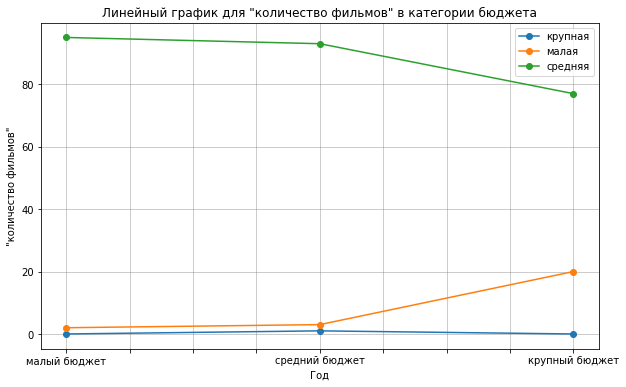

In [92]:
plot_create_rus('count','"количество фильмов"')

По графику видно, что фильмы со средней поддержкой от государства, преобладают по количеству. Оно и понятно, ведь таких фильмов - 90%.  
В категории с малым процентом поддержки от государства, преобладают крупнобюджетные фильмы.

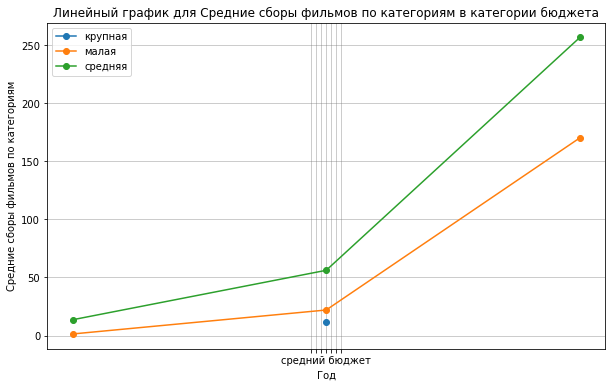

In [93]:
plot_create_rus('mean','Средние сборы фильмов по категориям')

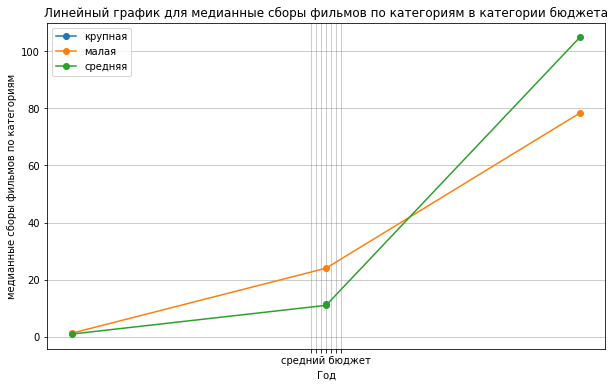

In [94]:
plot_create_rus('median','медианные сборы фильмов по категориям')

Что касается медианы и средней, картина приблизительна одинакова, несмотря на разное количество фильмов в категориях.  
Фильмы, имеющие крупный бюджет, более окупаются, вне зависимости от % вложения государством, по сравнению с фильмами, которые имеют малый и средние бюджеты.  
Наиболее успешной категорией оказались фильмы со средней поддержкой от государства. Это особо видно по фильмам, имеющиих крупный бюджет.

#### 4 этап - вопрос
- Какой жанр фильмов, государство охотнее спонсирует.

In [95]:
df_state.groupby(['main_genre'],observed=False)['main_genre'].agg(['count']).reset_index().sort_values(by='count',ascending=False)

,main_genre,count
6,драма,82
8,комедия,67
11,мультфильм,25
0,unknown,14
17,триллер,14
10,мелодрама,13
18,ужасы,10
20,фэнтези,10
3,военный,9
19,фантастика,9


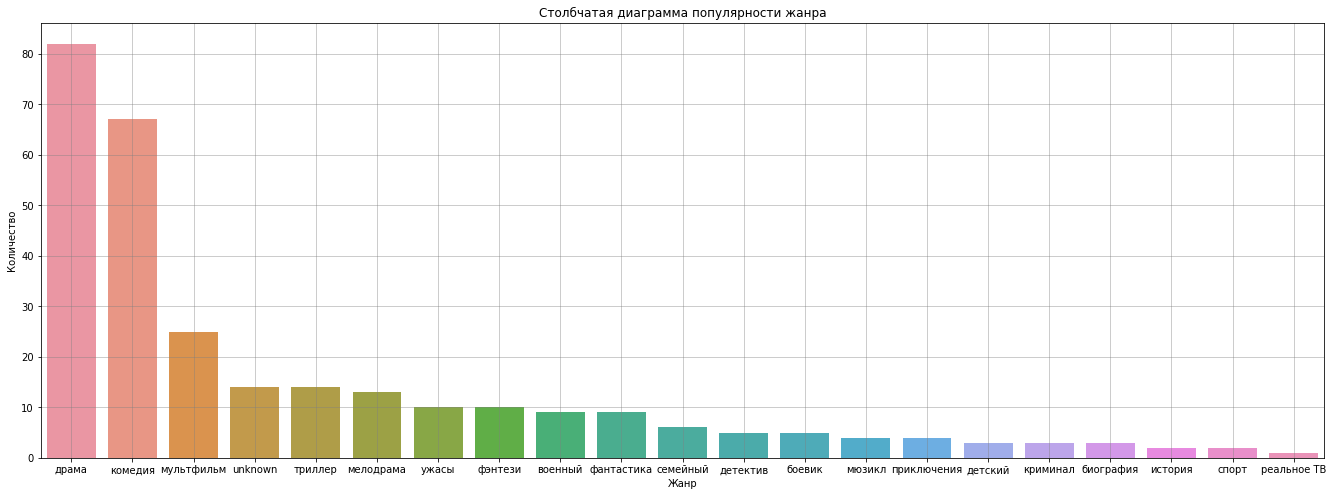

In [96]:
# Настройка размера фигуры
plt.figure(figsize=(23, 8))
# Построение столбчатой диаграммы с использованием данных из Dataframe 
sns.barplot(
    data=df_state.groupby(['main_genre'],observed=False)['main_genre'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
    ,x='main_genre'
    , y='count'
)
# Установка заголовка графика
plt.title('Столбчатая диаграмма популярности жанра')
#Добавление подписи для оси у 
plt.ylabel('Количество')
# Добавление порииси аля оси Х
plt.xlabel('Жанр')
# Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
plt.grid(color='grey', axis='both', alpha=0.5)

# Показ графика
plt.show()

Драмы и комедии - наше все)))  
Посмеялся, поплакал, можно и день заканчивать

#### 5 этап - вопрос
- Топ 3 киностудии

financing_source - топ 3 компании, которые имеют наибольшее число фильмов, спонсируемых государством
Интересно посмотреть, какая компания, среди этих трех, имеет наибольшее число удавшихся картин
Критериями успеха будут считаться то, сколько у них в среднем собирают фильмы в прокате

In [97]:
df_state_studio = df_state.groupby(['film_studio'],observed=False)['film_studio'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(3)
df_state_studio

,film_studio,count
197,"ООО ""ТаББаК""",7
194,"ООО ""Студия анимационного кино ""Мельница""",7
78,"ООО ""Кинокомпания ""СТВ""",6


In [98]:
print(' ')

In [99]:
for stud in df_state_studio['film_studio'].unique():
    mean = df_state[df_state['film_studio'] == stud]['box_office_mln'].mean()
    median = df_state[df_state['film_studio'] == stud]['box_office_mln'].median()
    budget_mean = df_state[df_state['film_studio'] == stud]['budget_mln'].mean()
    budget_med = df_state[df_state['film_studio'] == stud]['budget_mln'].median()
    print(f'компания {stud} принесла среднюю сумму сборов - {mean.round(2)} млн, медианную сумму сборов - {median.round(2)} млн, при бюджете {budget_mean.round(2)}/{budget_med.round(2)}')
    

компания ООО "ТаББаК" принесла среднюю сумму сборов - 398.16 млн, медианную сумму сборов - 308.4 млн, при бюджете 167.98/174.38
компания ООО "Студия анимационного кино "Мельница" принесла среднюю сумму сборов - 412.91 млн, медианную сумму сборов - 501.07 млн, при бюджете 216.07/185.5
компания ООО "Кинокомпания "СТВ" принесла среднюю сумму сборов - 15.89 млн, медианную сумму сборов - 9.37 млн, при бюджете 89.16/54.1


Среди топ 3 студий, по количеству фильмов, ООО "Студия анимационного кино "Мельница" и ООО "ТаББаК" имеют больший успех по среднему количеству кассовых сборов, и находятся примерно в одинаковом положении. Немаловажно то, что сумма сборов - превышает бюджет, в отличии от компании ООО "Кинокомпания "СТВ".
Табак и мельница - доверенные компании, и в них можно вкладываться с меньшем риском.

#### Вывод:
90% фильмов имеют поддержку от государства, более чем в 25% от общего бюджета.  
На рейтинг фильмов не влияет бюджет и процент вложений от государства.  
Фильмы, имеющие крупный бюджет, более окупаются, вне зависимости от % вложения государством, по сравнению с фильмами, которые имеют малый и средние бюджеты.  
Наиболее успешной категорией оказались фильмы со средней поддержкой от государства. Это особо видно по фильмам, имеющиих крупный бюджет.
Также можно рассмотреть отдельные студии, которые гарантированно принесли доход от выпущенных фильмов

### Шаг 5. Общий вывод

<div style="border: solid green 2px; padding: 10px">
  <p>
    Генеральной целью было изучение рынка российского кинопроката и выявление текущих трендов. Также, необходимо было уделить внимание фильмам, которые получили государственную поддержку.  <br>
    Начиная с 2014 года можно наблюдать динамику увеличения более кассовых фильмов, к 2019 году есть фильмы, собравшие 3 млрд в Российском прокате. Если до 2014 года, медианная сумма сборов по годам, не превышает 200 тысяч, то в период 2014-2018 года эта отметка достигает 7 млн рублей.  <br>
    Также и количество фильмов, которые принесли более 100 млн в прокате, увеличивается. В 2014 таких фильмов 10, в 2018 - таких фильмов уже 50.  <br>
    К 2019 году, растущая динамика от 2014 году идет на спад.  <br>
  </p>
    
  *Таблица годовых показателей фильмов по сумме и годам*
    
  <table style="border-collapse: collapse; width: 70%; margin-top: 10px;">
    <tr>
      <th style="border: 1px solid #ccc; padding: 5px;">год</th>
      <th style="border: 1px solid #ccc; padding: 5px;">количество фильмов, принесших более 100 млн</th>
      <th style="border: 1px solid #ccc; padding: 5px;">медианная сумма сборов</th>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2014</td>
      <td style="border: 1px solid #ccc; padding: 5px;">12</td>
      <td style="border: 1px solid #ccc; padding: 5px;">18 тыс.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2015</td>
      <td style="border: 1px solid #ccc; padding: 5px;">49</td>
      <td style="border: 1px solid #ccc; padding: 5px;">4 млн 28 тыс.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2016</td>
      <td style="border: 1px solid #ccc; padding: 5px;">58</td>
      <td style="border: 1px solid #ccc; padding: 5px;">3 млн 16 тыс.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2017</td>
      <td style="border: 1px solid #ccc; padding: 5px;">43</td>
      <td style="border: 1px solid #ccc; padding: 5px;">7 млн 30 тыс.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2018</td>
      <td style="border: 1px solid #ccc; padding: 5px;">60</td>
      <td style="border: 1px solid #ccc; padding: 5px;">7 млн 29 тыс.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ccc; padding: 5px;">2019</td>
      <td style="border: 1px solid #ccc; padding: 5px;">56</td>
      <td style="border: 1px solid #ccc; padding: 5px;">4 млн 17 тыс.</td>
    </tr>
  </table>

    
Наибольшее количество фильмов, вышедших в прокат, имеют категорию 16+ и 18+.  
Куда меньше, по количеству, занимают произведения с категорием 6+, однако, практически во все года, они имеют огромные кассовые сборы.  
Пик приходится на 2017 год и достигает медианного показателя в 45 млн по сборам, что в 4-5 раз больше, чем у остальных ограничений по фильмам.



Таким образом, рынок российского кинопроката характеризуется заметным ростом с каждым годом, и особой популярностью пользуются мультфильмы с рейтингом 6+
Что касается спонсируемых государством фильмов, популярны такие жанры, как драмы и комедии. Чем больше бюджет у фильма, тем больше составят сборы в кинопррокате.  
Также по сборам, больше кассовых средств приносят фильмы, полностью спонсируемые государством, а не на какой-либо процент от общего бюджета. 

<br>
<br>
<br>
Эти данные нельзя было бы представить, без предварительной предобработки.
Для их получения были обработаны типы данных в столбцах, заменены пропущенные значения.  
Немаловажную часть играет анализ экстремальных значений - отброшены фильмы, бюджет которых составлял более 500 млн и фильмы, бюджет которых не был известен для фильмов, получивших поддержку.  
Также добавлено деление на категории, по которым проводился основной анализ.
</div>